In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Iteration 1

In [72]:
import pickle

with open(r'..\data\flight_data_engineered_trans.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [76]:
len(df_flights.columns.to_list())

204

In [6]:
X = df_flights.drop(columns='arr_delay')
y = df_flights['arr_delay']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(98363, 203)

In [23]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=160) # create a PCA object
pca.fit(X_scaled) # calculate loading scores and the variation each principal component accounts for
pca_data = pca.transform(X_scaled) # generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.988921,-1.287123,-0.040748,-4.094079,-2.636208,-2.447128,-0.166413,0.946272,-0.629712,-0.437961,...,0.551204,-0.018876,-0.278320,0.159809,0.080378,0.021379,0.030290,0.340288,-0.072146,0.109022
1,2.235913,-0.880860,-1.190916,-2.458216,-1.970533,-2.900255,0.802494,1.014352,-0.286611,-0.172900,...,0.640161,-0.015401,-0.701206,-0.141448,1.778331,0.124130,-0.020337,0.308222,-0.131856,0.070797
2,2.012713,-0.703522,-2.450522,0.297815,-2.316122,-3.562055,0.791183,0.851875,-0.273703,-0.140397,...,0.265600,0.091281,-0.276948,0.124482,-0.248962,0.012011,0.013742,0.310763,0.318511,-0.345276
3,2.215539,1.814364,-2.927197,0.833706,-2.940460,-3.106541,-0.466742,2.505238,-0.268607,-0.163958,...,0.656426,-0.110570,-0.119719,0.243636,-0.149770,-0.048327,0.011814,0.333398,0.062524,-0.067090
4,2.452116,1.602065,-1.110693,-3.439980,-2.511413,-2.071273,-0.178107,2.558096,-0.206929,-0.230421,...,0.697571,-0.114421,-0.144045,0.230822,0.029974,-0.024364,0.017209,0.331736,0.105721,-0.089631


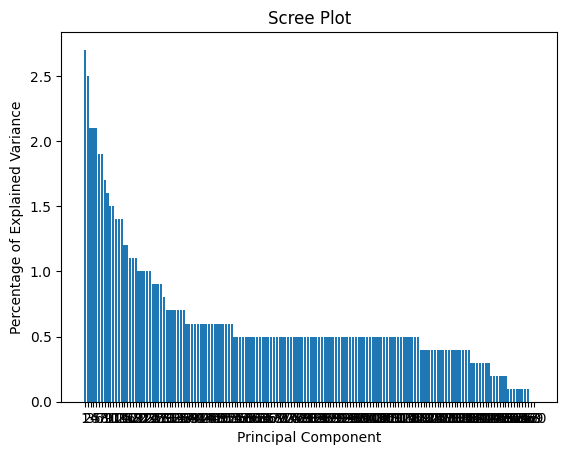

In [24]:
# draw a scree plot to see how many PC should go into final plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # calculate the percentage of variation that each PC accounts for.
labels = [str(x) for x in range(1, len(per_var)+1)] # create labels for the scree plot (one label per PC)

# use matplotlib to create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

<AxesSubplot: >

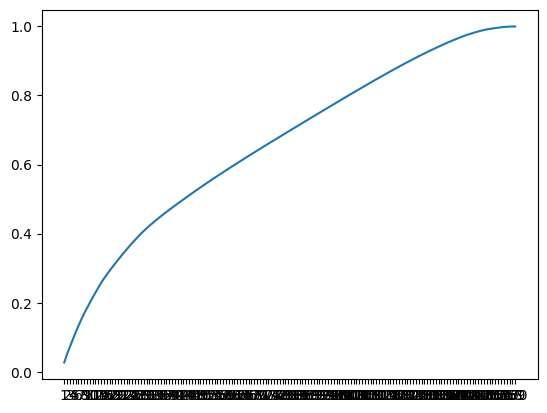

In [25]:
# Cumulative explained ratio plot
sns.lineplot(x=labels, y=np.cumsum(pca.explained_variance_ratio_))

In [26]:
# make a pickle of the pca data
# import pickle

# iteration = pca_data

# with open(r'..\data\iteration1.pickle','wb') as flight_data_file:
#      pickle.dump(iteration, flight_data_file)

# Iteration 2

In [78]:
import pickle

with open(r'..\data\flight_data_engineered_trans2.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [79]:
len(df_flights.columns.to_list())

68

In [28]:
X = df_flights.drop(columns='arr_delay')
y = df_flights['arr_delay']

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(98363, 67)

In [47]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=55) # create a PCA object
pca.fit(X_scaled) # calculate loading scores and the variation each principal component accounts for
pca_data = pca.transform(X_scaled) # generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.553274,0.407137,-1.743111,0.353716,-2.695247,-0.672596,-0.585126,-1.232649,0.726125,1.491841,...,-0.469839,1.106791,3.704424,-0.961645,-0.478101,0.396855,1.871876,0.274501,0.601974,0.770614
1,1.632594,-0.394344,0.191634,0.538312,-2.060398,0.993830,0.530146,-0.754659,3.281367,1.896337,...,1.134304,0.384445,3.267607,-0.836417,-0.771948,-0.107570,1.193564,-0.452586,-0.264425,-2.695722
2,1.350828,-0.461148,1.600333,0.820061,-1.950081,1.596608,0.389117,-1.888040,0.863901,1.641510,...,0.241349,1.821533,2.986938,-0.923734,-0.929379,-0.247376,1.612614,-0.478210,0.089395,-0.788452
3,0.057112,-2.859668,2.044800,0.240921,-2.566995,-0.721634,-0.140800,-0.472454,-0.753551,1.723119,...,1.274773,0.572801,3.071910,-0.543107,-1.576816,0.162996,-0.048918,-0.317594,0.652149,0.498530
4,0.280074,-2.812063,-2.043877,0.237612,-2.335686,0.020250,-0.158831,-0.609259,-1.347681,1.744678,...,0.873730,1.380040,2.846596,-0.593178,-1.770681,0.129944,-0.114536,-0.471271,0.443136,-0.503159


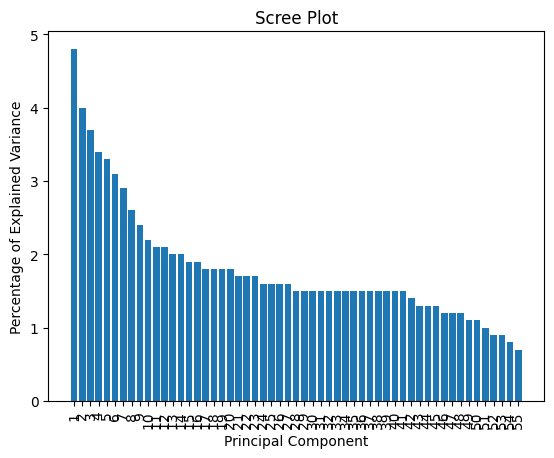

In [48]:
# draw a scree plot to see how many PC should go into final plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # calculate the percentage of variation that each PC accounts for.
labels = [str(x) for x in range(1, len(per_var)+1)] # create labels for the scree plot (one label per PC)

# use matplotlib to create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

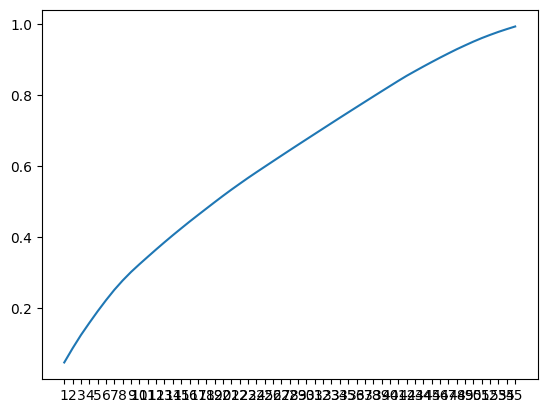

In [49]:
# Cumulative explained ratio plot
sns.lineplot(x=labels, y=np.cumsum(pca.explained_variance_ratio_))

In [50]:
# make a pickle of the pca data
import pickle

iteration = pca_data

with open(r'..\data\iteration2.pickle','wb') as flight_data_file:
     pickle.dump(iteration, flight_data_file)

# Iteration 3

In [52]:
import pandas as pd

df_flights = pd.read_csv(r'..\csvs\iteration_6.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,...,dest_state_ TT,dest_state_ TX,dest_state_ UT,dest_state_ VA,dest_state_ VI,dest_state_ VT,dest_state_ WA,dest_state_ WI,dest_state_ WV,dest_state_ WY
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0,...,0,0,0,0,0,0,0,0,0,0
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0,...,0,0,0,0,0,0,0,0,0,0
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_flights.columns.to_list()

['crs_elapsed_time',
 'distance',
 'arr_delay',
 'fl_date_year',
 'fl_date_month',
 'fl_date_day',
 'crs_dep_time_hour',
 'crs_dep_time_minute',
 'crs_arr_time_hour',
 'crs_arr_time_minute',
 'mkt_unique_carrier_AA',
 'mkt_unique_carrier_AS',
 'mkt_unique_carrier_B6',
 'mkt_unique_carrier_DL',
 'mkt_unique_carrier_F9',
 'mkt_unique_carrier_G4',
 'mkt_unique_carrier_HA',
 'mkt_unique_carrier_NK',
 'mkt_unique_carrier_UA',
 'mkt_unique_carrier_WN',
 'op_unique_carrier_9E',
 'op_unique_carrier_9K',
 'op_unique_carrier_AA',
 'op_unique_carrier_AS',
 'op_unique_carrier_AX',
 'op_unique_carrier_B6',
 'op_unique_carrier_C5',
 'op_unique_carrier_CP',
 'op_unique_carrier_DL',
 'op_unique_carrier_EM',
 'op_unique_carrier_EV',
 'op_unique_carrier_F9',
 'op_unique_carrier_G4',
 'op_unique_carrier_G7',
 'op_unique_carrier_HA',
 'op_unique_carrier_KS',
 'op_unique_carrier_MQ',
 'op_unique_carrier_NK',
 'op_unique_carrier_OH',
 'op_unique_carrier_OO',
 'op_unique_carrier_PT',
 'op_unique_carrier_QX',

In [53]:
X = df_flights.drop(columns='arr_delay')
y = df_flights['arr_delay']

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(98829, 152)

In [64]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=130) # create a PCA object
pca.fit(X_scaled) # calculate loading scores and the variation each principal component accounts for
pca_data = pca.transform(X_scaled) # generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-0.182148,0.846778,-1.602141,-1.559301,-2.892289,-1.029644,0.937200,0.023849,0.095142,0.117460,...,-1.028010,-1.641697,-0.206607,0.496862,-0.092013,-0.825889,-0.014404,-0.383671,0.229287,-0.384401
1,-0.159662,1.061321,-1.372119,-1.412996,-3.094351,-0.748764,0.705926,0.022466,0.154540,0.219225,...,0.942615,-1.458215,-0.371234,0.586507,-0.302024,-0.729127,0.033857,-0.623764,0.138536,-0.521227
2,-0.207882,1.022575,-1.366734,-1.455056,-2.931203,-0.677423,0.657431,-0.055315,0.144125,0.166159,...,1.035360,-1.368951,-0.338940,0.650361,-0.276236,-0.703150,-0.025860,-0.611297,0.235011,-0.489555
3,-0.130609,0.819169,-1.361118,-2.189907,-2.921219,-1.018881,1.051572,-0.659037,0.377943,-0.069952,...,-0.138968,0.269229,-0.073951,0.091082,-0.607145,-0.329053,-0.046228,0.052769,-0.043796,0.022388
4,-0.094924,0.829021,-1.358104,-2.129924,-3.018825,-1.102095,1.087522,-0.520734,0.394217,0.013792,...,-0.171463,0.249013,-0.061992,0.100543,-0.619547,-0.320547,-0.041991,0.067296,-0.061928,0.021629


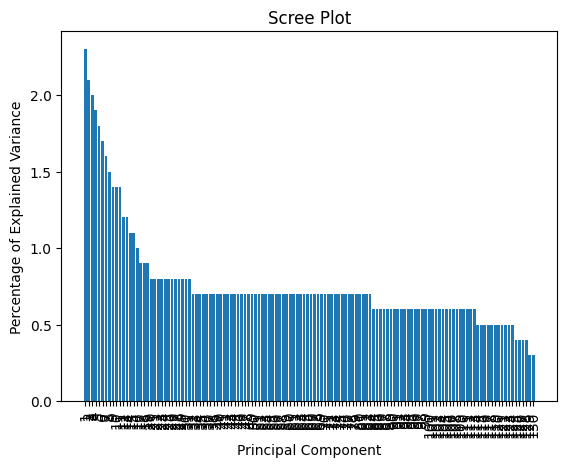

In [65]:
# draw a scree plot to see how many PC should go into final plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) # calculate the percentage of variation that each PC accounts for.
labels = [str(x) for x in range(1, len(per_var)+1)] # create labels for the scree plot (one label per PC)

# use matplotlib to create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

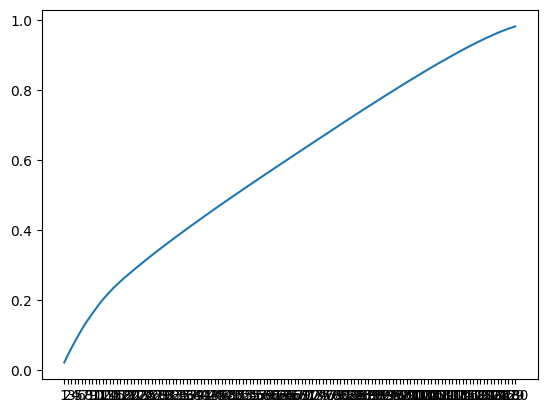

In [66]:
# Cumulative explained ratio plot
sns.lineplot(x=labels, y=np.cumsum(pca.explained_variance_ratio_))

In [67]:
# make a pickle of the pca data
import pickle

iteration = pca_data

with open(r'..\data\iteration3.pickle','wb') as flight_data_file:
     pickle.dump(iteration, flight_data_file)